# 作業目標:¶
利用手寫辨識資料說明MLP 中, 神經網路層的多寡跟預測結果的差異

# 作業重點:
[練習]請嘗試新增一層或兩層看看最後預測結果是否有差異
model.add(Dense(units=256, input_dim=784, kernel_initializer='normal', activation='relu'))

Ans: 新增了兩層,預測分數結果反而差一點,如此看來新增多層結果未必會比較好


# 資料預處理

In [18]:
from keras.utils import np_utils
import numpy as np
np.random.seed(10)

In [19]:
#載入手寫辨識的資料集
from keras.datasets import mnist
(x_train_image,y_train_label),\
(x_test_image,y_test_label)= mnist.load_data()

In [20]:
#指定測試集與訓練資料集
x_Train =x_train_image.reshape(60000, 784).astype('float32')
x_Test = x_test_image.reshape(10000, 784).astype('float32')

In [21]:
# normalize inputs from 0-255 to 0-1
x_Train_normalize = x_Train / 255
x_Test_normalize = x_Test / 255

In [22]:
#把LABEL轉成NUMERICAL Categorical 
y_Train_OneHot = np_utils.to_categorical(y_train_label)
y_Test_OneHot = np_utils.to_categorical(y_test_label)

# 建立模型

In [23]:
from keras.models import Sequential
from keras.layers import Dense

In [24]:
#建立模型
#宣告採用序列模型
model = Sequential()

In [25]:
#建構輸入層
model.add(Dense(units=256, 
                input_dim=784, 
                kernel_initializer='normal', 
                activation='relu'))

In [26]:
#再新增一層輸入層
model.add(Dense(units=256, 
                input_dim=784, 
                kernel_initializer='normal', 
                activation='relu'))

In [27]:
#新增第三層輸入層
model.add(Dense(units=256, 
                input_dim=784, 
                kernel_initializer='normal', 
                activation='relu'))

In [28]:
#建構輸出層
model.add(Dense(units=10, 
                kernel_initializer='normal', 
                activation='softmax'))

In [29]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_5 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_6 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_7 (Dense)              (None, 10)                2570      
Total params: 335,114
Trainable params: 335,114
Non-trainable params: 0
_________________________________________________________________
None


# 訓練模型

In [30]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

In [31]:
train_history =model.fit(x=x_Train_normalize,
                         y=y_Train_OneHot,validation_split=0.2, 
                         epochs=10, batch_size=32,verbose=1)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 5s 100us/step - loss: 0.2385 - acc: 0.9284 - val_loss: 0.1060 - val_acc: 0.9685
Epoch 2/10
48000/48000 [==============================] - 4s 91us/step - loss: 0.0991 - acc: 0.9701 - val_loss: 0.0975 - val_acc: 0.9713
Epoch 3/10
48000/48000 [==============================] - 4s 94us/step - loss: 0.0700 - acc: 0.9779 - val_loss: 0.0949 - val_acc: 0.9726
Epoch 4/10
48000/48000 [==============================] - 4s 93us/step - loss: 0.0545 - acc: 0.9828 - val_loss: 0.1122 - val_acc: 0.9699
Epoch 5/10
48000/48000 [==============================] - 5s 98us/step - loss: 0.0451 - acc: 0.9856 - val_loss: 0.0937 - val_acc: 0.9748
Epoch 6/10
48000/48000 [==============================] - 5s 101us/step - loss: 0.0369 - acc: 0.9885 - val_loss: 0.0975 - val_acc: 0.9771
Epoch 7/10
48000/48000 [==============================] - 5s 106us/step - loss: 0.0330 - acc: 0.9900 - val_loss: 0.1128 - val_

# 以圖形顯示訓練過程

In [32]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

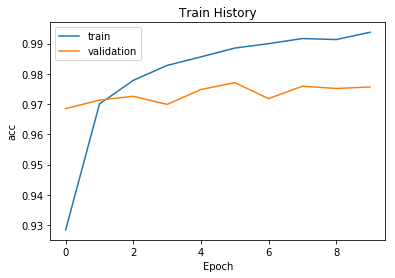

In [33]:
show_train_history(train_history,'acc','val_acc')

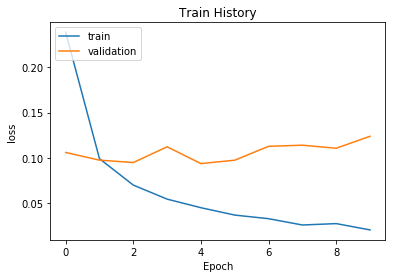

In [34]:
show_train_history(train_history,'loss','val_loss')

# 評估模型準確率

In [35]:
scores = model.evaluate(x_Test_normalize, y_Test_OneHot)
print()
print('accuracy=',scores[1])

10000/10000 [==============================] - 0s 17us/step

accuracy= 0.9753
